## Project 4. Store sales prediction using Neural Networks
### Walmart sales from project 1
### Rossmann sales prediction (6 weeks) on data of different nature

1. With TensorFlow on raw data (cleaned-up NaNs, errors, inconsistencies)
2. With TensorFlow WITH engineered features from project 1
3. With PyTorch?

### Code setup

In [113]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error

In [3]:
# base dataset
df_path  = '../datasets/walmart_sales.csv'
df = pd.read_csv(df_path)

### Necessary cleanup

In [4]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
numerical_types = ['int32','int64','float32','float64']

In [7]:
numerical_cols = [col for col in df.columns if df[col].dtype in numerical_types]
numerical_cols

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

#### 0-1 scaling
Typically heavily recommended for gradient-descent based algorithms

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [10]:
df_scaled = df.copy()

In [11]:
df_scaled[numerical_cols] = scaler.transform(df_scaled[numerical_cols])

In [12]:
df_scaled.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,05-02-2010,0.397291,0.0,0.434149,0.050100,0.840500,0.405118
1,0.0,12-02-2010,0.396811,1.0,0.396967,0.038076,0.841941,0.405118
2,0.0,19-02-2010,0.388501,0.0,0.410861,0.021042,0.842405,0.405118
3,0.0,26-02-2010,0.332458,0.0,0.476419,0.044589,0.842707,0.405118
4,0.0,05-03-2010,0.372661,0.0,0.475147,0.076653,0.843008,0.405118


In [23]:
df_scaled[numerical_cols] = df_scaled[numerical_cols].astype('float32')

In [24]:
X = df_scaled.drop(['Weekly_Sales'], axis=1)
y = df_scaled['Weekly_Sales']

#### Drop the date for now as it is not a numerical feature and we'd need to preprocess it in some way before supplying to the model

In [46]:
# date stored separately for possible future use
date = df_scaled['Date']

#### Important: for tensorflow, it may sometimes be necessary to convert dataframes to numpy arrays, with float types at most float32
Why? TensorFlow

In [43]:
X = np.asarray(X.drop(['Date'], axis=1)).astype('float32')

In [55]:
type(X_train)

numpy.ndarray

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

In [53]:
n_features = X_train.shape[1]

In [54]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [57]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [58]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10,
)

Epoch 1/10

21/21 [==============================] - 1s 11ms/step - loss: 0.1350 - val_loss: 0.1252
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.1158 - val_loss: 0.1159
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1088 - val_loss: 0.1107
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 0.1029 - val_loss: 0.1059
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1008 - val_loss: 0.1044
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0977 - val_loss: 0.1027
Epoch 7/10
21/21 [==============================] - 0s 6ms/step - loss: 0.0945 - val_loss: 0.0991
Epoch 8/10
21/21 [==============================] - 0s 6ms/step - loss: 0.0915 - val_loss: 0.1023
Epoch 9/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0912 - val_loss: 0.0973
Epoch 10/10
21/21 [==============================] - 0s 6ms/step - loss: 0.0898 - val_loss: 0.0946


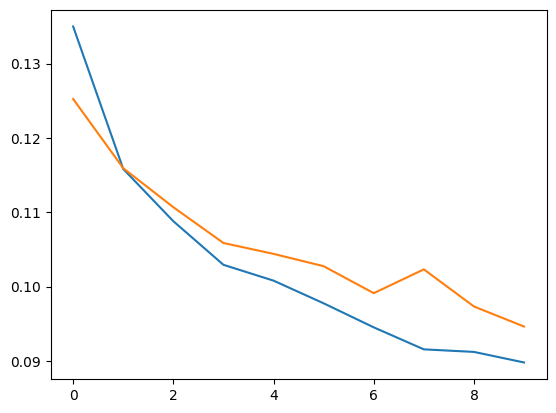

In [60]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

In [62]:
y_pred = model.predict(X_test)

41/41 [==============================] - 0s 1ms/step


In [64]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.0946113

In [66]:
df_pred = pd.DataFrame()

In [73]:
y_pred[:,0]

array([0.23244825, 0.18359867, 0.08644051, ..., 0.32563195, 0.44880763,
       0.14418504], dtype=float32)

In [76]:
y_test

4104    0.071989
4998    0.169474
5025    0.062320
3474    0.250853
5696    0.190182
          ...   
5291    0.041153
5187    0.091362
129     0.340604
1987    0.372229
3566    0.139896
Name: Weekly_Sales, Length: 1287, dtype: float32

In [79]:
df_pred['y_test'] = pd.Series(y_pred[:,0])
df_pred['y_pred'] = pd.Series(y_test)
df_pred['error'] = abs(df_pred['y_test'] - df_pred['y_pred'])
df_pred.sort_values(['error'], ascending=True).head()

,y_test,y_pred,error
1088,0.198752,0.199515,0.000763
386,0.054322,0.052150,0.002172
1111,0.202236,0.197077,0.005159
155,0.447587,0.441285,0.006302
882,0.092065,0.099827,0.007762


Wow, a MAE of 0.09 - incredible performance, but let's not forget - we scaled the data to belong in range 0-1 before training! To get an accurate estimate of model performance, we need to reverse that scaling

In [90]:
# scaler.inverse_transform(mae.reshape(1,7))

### With proper scaling, based on the training section
And easy inversability

In [91]:
df_proper = df.drop(['Date'], axis=1)

In [92]:
# Create training and validation splits
df_train = df_proper.sample(frac=0.8, random_state=0)
df_valid = df_proper.drop(df_train.index)

In [93]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [94]:
max_

Store           4.500000e+01
Weekly_Sales    3.818686e+06
Holiday_Flag    1.000000e+00
Temperature     1.001400e+02
Fuel_Price      4.468000e+00
CPI             2.272328e+02
Unemployment    1.431300e+01
dtype: float64

In [100]:
# df_train['Weekly_Sales']

In [101]:
# (df_train['Weekly_Sales']) * (max_['Weekly_Sales'] - min_['Weekly_Sales']) + min_['Weekly_Sales']

In [102]:
# df['Weekly_Sales'].loc[3949]

In [103]:
# Split features and target
X_train = df_train.drop('Weekly_Sales', axis=1)
X_valid = df_valid.drop('Weekly_Sales', axis=1)
y_train = df_train['Weekly_Sales']
y_valid = df_valid['Weekly_Sales']

Epoch 1/10
21/21 [==============================] - 1s 10ms/step - loss: 0.1420 - val_loss: 0.1216
Epoch 2/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1188 - val_loss: 0.1102
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1083 - val_loss: 0.1036
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1027 - val_loss: 0.1065
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1024 - val_loss: 0.1008
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 0.0995 - val_loss: 0.0978
Epoch 7/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0975 - val_loss: 0.0989
Epoch 8/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0957 - val_loss: 0.0960
Epoch 9/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0934 - val_loss: 0.0915
Epoch 10/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0906 - val_loss: 0.0906


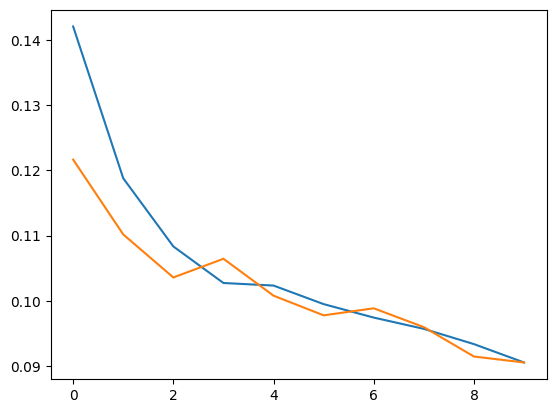

In [106]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

In [107]:
y_pred = model.predict(X_valid)

41/41 [==============================] - 0s 975us/step


In [109]:
mae = mean_absolute_error(y_valid, y_pred)
mae_inv_scaled = mae * (max_['Weekly_Sales'] - min_['Weekly_Sales']) + min_['Weekly_Sales']
mae_inv_scaled

536860.6526306982

Ouch! A MAE of over 500k! That's way too high to be considered usable. Let's check the proportions of mae to the highest sales data in the dataset to see if the scaled mae error does indeed represent that number

In [110]:
mae

0.09057953958899057

In [111]:
df['Weekly_Sales'].max()

3818686.45

In [112]:
mae_inv_scaled / df['Weekly_Sales'].max()

0.14058778055231483

Pretty much. The scaling inversion was correct.

#### Training for longer on raw data
As seen in the training and validation curves - we cut off training at 10 epochs, despite the descent angles still being quite fast. Perhaps further training will noticeably improve the performance. Let's see.  
To not tread blindly into overfitting, let's also add a early stopping mechanism

In [114]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

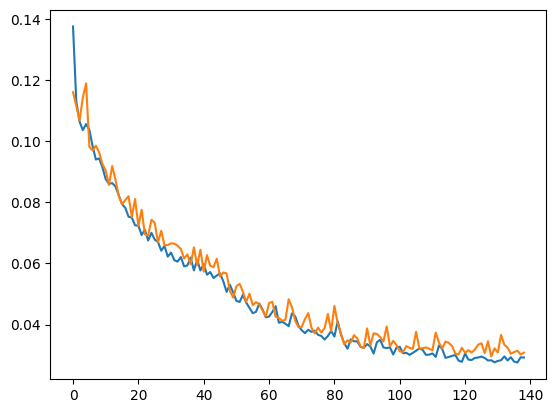

In [115]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

Indeed it seems training was necessary no longer than for around 140 epochs, instead of 500 we set, let's look at some results now:

In [116]:
y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
mae_inv_scaled = mae * (max_['Weekly_Sales'] - min_['Weekly_Sales']) + min_['Weekly_Sales']
mae_inv_scaled

41/41 [==============================] - 0s 1ms/step


319203.21501476236

319k. Quite an improvement, still a large value

#### Overfitting?

The validation curve is above the training curve at all times. Perhaps the model is overfitting a little? Let's explore some simple overfitting-preventing techniques

41/41 [==============================] - 0s 1ms/step
mae:  394801.1546066284


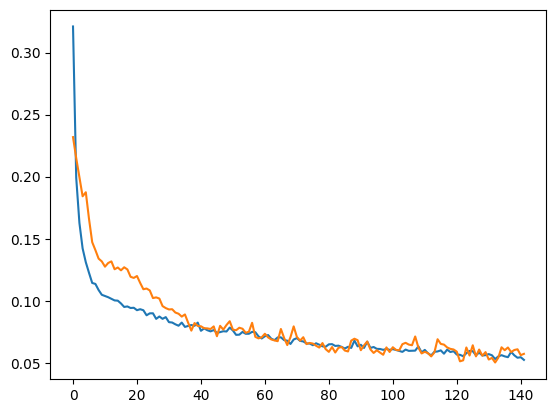

In [117]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
mae_inv_scaled = mae * (max_['Weekly_Sales'] - min_['Weekly_Sales']) + min_['Weekly_Sales']
print('mae: ', mae_inv_scaled)

Indeed a closer relation between training a validating, no improvement in prediction quality though

### Data with engineered features

In [119]:
# dataset with engineered features
df_eng_path = '../datasets/walmart_sales_engineered.csv'
df_eng = pd.read_csv(df_eng_path, index_col = 0)

In [120]:
df_eng

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,...,weekly_sales_diff,temperature_diff,fuel_price_diff,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,...,0.00,0.00,0.000,0.000000,0.000,2.0,5,1.0,0.0,0.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,...,-1733.46,-3.80,-0.024,0.145812,0.000,2.0,5,1.0,0.0,1.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,...,-29989.27,1.42,-0.034,0.046973,0.000,2.0,6,2.0,1.0,-1.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,...,-202240.58,6.70,0.047,0.030500,0.000,2.0,7,3.0,0.0,0.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,...,145079.09,-0.13,0.064,0.030500,0.000,2.0,8,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,...,-9912.25,-0.44,-0.041,0.156854,0.000,9.0,38,4.0,0.0,0.0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,...,20281.12,0.01,-0.012,0.156854,-0.017,9.0,39,5.0,0.0,0.0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,...,1009.29,-10.42,0.015,0.156854,0.000,10.0,40,1.0,0.0,0.0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,...,-16338.83,2.00,-0.031,0.003589,0.000,10.0,41,2.0,0.0,0.0


In [123]:
# Create training and validation splits
df_proper = df_eng.drop(['date'], axis=1)

df_train = df_proper.sample(frac=0.8, random_state=0)
df_valid = df_proper.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('weekly_sales', axis=1)
X_valid = df_valid.drop('weekly_sales', axis=1)
y_train = df_train['weekly_sales']
y_valid = df_valid['weekly_sales']

In [125]:
n_features = X_train.shape[1]

41/41 [==============================] - 0s 975us/step
mae:  234987.14475973826


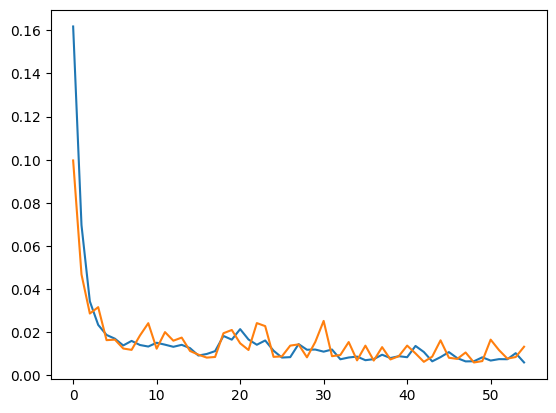

In [126]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
mae_inv_scaled = mae * (max_['weekly_sales'] - min_['weekly_sales']) + min_['weekly_sales']
print('mae: ', mae_inv_scaled)

Around 235 thousand, better, still worse than our best performing model from Project 1

### A simpler model?
Perhaps a simpler model will be able to catch some more obvious relations within the data?

41/41 [==============================] - 0s 625us/step
mae:  225852.1015754397


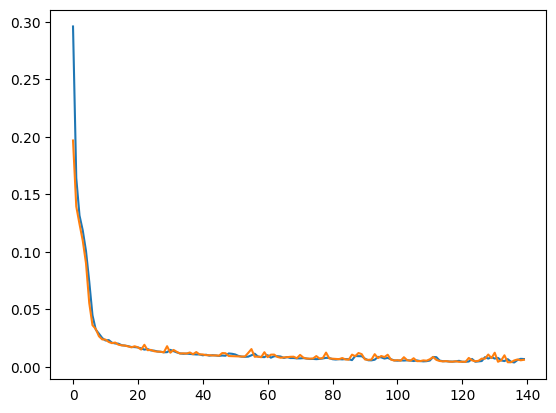

In [128]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[n_features]),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
mae_inv_scaled = mae * (max_['weekly_sales'] - min_['weekly_sales']) + min_['weekly_sales']
print('mae: ', mae_inv_scaled)

Indeed a slight improvement, still about 5 times worse than our best model! Not good!

## TODOs:
* improving performance
* rossmann store sales